1. Specific:
   - Bagaimana kami mengidentifikasi pola perilaku pelanggan yang berpotensi churn?"
   
2. Measurable:
   - Apa saja variabel yang paling berpengaruh dalam memprediksi kemungkinan churn pelanggan?"

3. Action-oriented:
   - Bagaimana kami mengukur efektivitas kampanye retensi yang telah diluncurkan?"

4. Relevant:
   - Apa strategi yang paling efektif dalam mempertahankan pelanggan yang berisiko churn?"

5. Time-bound:
   - Bagaimana kami dapat meningkatkan personalisasi dalam komunikasi dengan pelanggan untuk meningkatkan keterlibatan?"

# Importing Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import matplotlib.ticker as ticker
import missingno as ms
import warnings


warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
plt.style.use('Solarize_Light2')

# Wrangling Data

## Gathering Data

In [2]:
# fetch dataset
online_retail = fetch_ucirepo(id=352)

In [3]:
df_metadata = online_retail.metadata

print(df_metadata)

{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining', 'aut

In [4]:
df_variables = online_retail.metadata

print(df_variables)

{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining', 'aut

In [5]:
df = pd.read_excel("./data/Online Retail.xlsx")

In [6]:
print("Data Para Konsumen Fashion Retail : ",df.head(10))

Data Para Konsumen Fashion Retail :    InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0

## Assesing Data

### Infomation Tabel Consumers Fashion Retail

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- Terdapat 541,909 entri dalam dataset ini.
- Kolom Description memiliki 1,454 nilai yang hilang (null).
- Kolom CustomerID memiliki 135,080 nilai yang hilang (null), yang berarti sebagian besar transaksi tidak terkait dengan pelanggan tertentu.
- Data ini memiliki beberapa tipe data, termasuk objek (string), integer, float, dan datetime.

Missing Value

Kolom Description dan CustomerID

In [8]:
print("DataFrame Consumers Fashion Retail : ")
print(df.isna().sum())

DataFrame Consumers Fashion Retail : 
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


<Axes: >

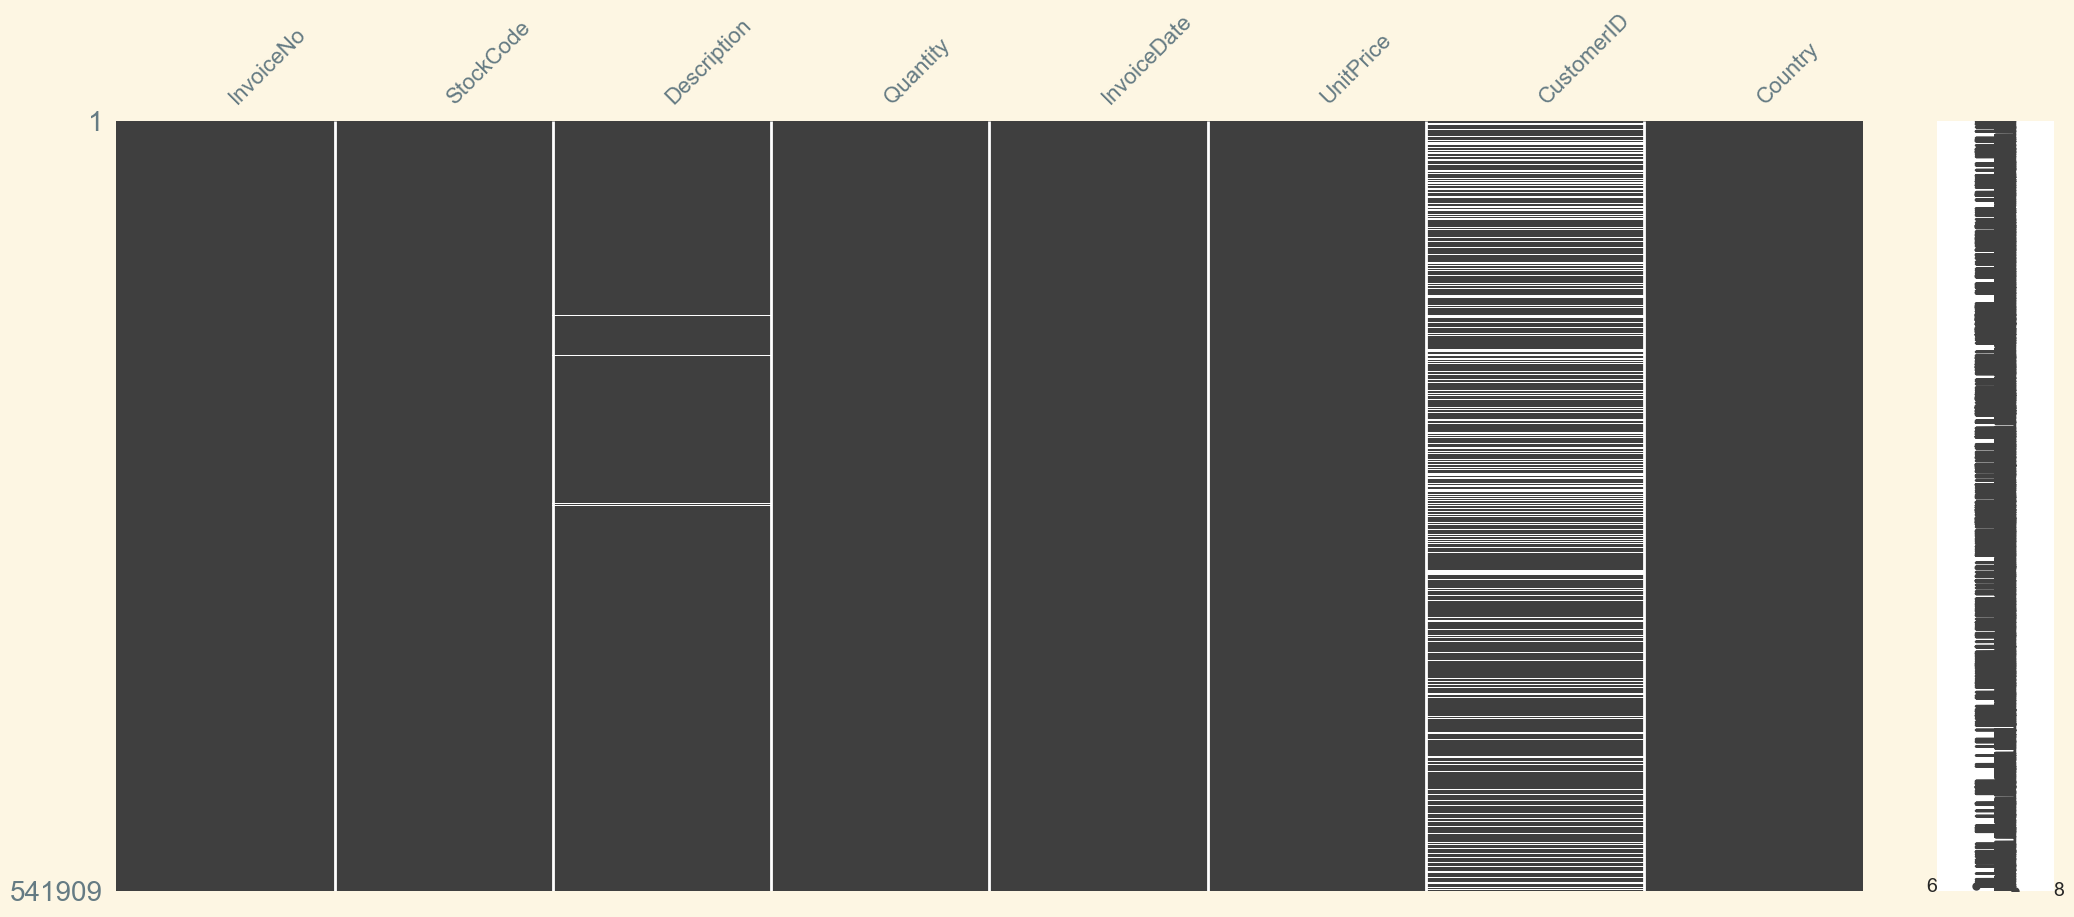

In [9]:
ms.matrix(df)

In [10]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
57361,541205,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,1,2011-01-14 12:23:00,2.55,18106.0,United Kingdom
375741,569474,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,1,2011-10-04 12:39:00,2.95,14178.0,United Kingdom
148321,549233,23156,SET OF 5 MINI GROCERY MAGNETS,12,2011-04-07 11:06:00,2.08,14912.0,Italy
335246,566281,23244,ROUND STORAGE TIN VINTAGE LEAF,6,2011-09-11 14:15:00,1.95,12748.0,United Kingdom
327634,565682,15056N,EDWARDIAN PARASOL NATURAL,1,2011-09-06 10:42:00,5.95,14796.0,United Kingdom
290239,562370,22555,PLASTERS IN TIN STRONGMAN,12,2011-08-04 14:20:00,1.65,12626.0,Germany
43928,540154,22376,AIRLINE BAG VINTAGE JET SET WHITE,1,2011-01-05 11:30:00,4.21,NaN,United Kingdom
75802,542611,22893,MINI CAKE STAND T-LIGHT HOLDER,12,2011-01-30 14:13:00,0.42,15415.0,United Kingdom
245859,558636,22673,FRENCH GARDEN SIGN BLUE METAL,7,2011-06-30 19:58:00,1.25,14702.0,United Kingdom
321365,565150,85230B,CINNAMON SCENTED VOTIVE CANDLE,72,2011-09-01 14:26:00,0.21,14298.0,United Kingdom


Duplicated Data

In [11]:
print('Jumlah Duplikasi : ', df.duplicated().sum())

Jumlah Duplikasi :  5268


Descriptive analysis Statistic

In [12]:
df.describe().style.background_gradient(cmap='RdPu')

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,nan,96.759853,1713.600303


- jumlah data entries ada : 541909 Data
- Q1 dan Q3 Quantity : 1.25 and 4.13
- Standard Deviation Quantity : 218.08
- mean Quantity : 9.55%
- mean UnitPrice : 4.61% 
- mean CustomerID : 15287 Customer

### Cleaning Data

#### Metode Imputation

Kolom Description missing values 1454

In [13]:
df[df.Description .isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [14]:
df.Description.value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: count, Length: 4223, dtype: int64

In [15]:
# df['Description'].fillna(df['Description'].mean(), inplace=True)
df['Description'].fillna('Unknown', inplace=True)

print(df.isna().sum())

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Kolom Customer missing values 135.080

In [16]:
df[df.CustomerID .isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,Unknown,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [17]:
df.CustomerID.value_counts()

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

In [18]:
# Menghapus kolom 'CustomerID' dari DataFrame
df = df.drop(columns=['CustomerID'])

In [19]:
print(df.isna().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 28.9+ MB


In [25]:
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    df.reset_index(inplace=True, drop=True)

print("Jumlah Data yang duplicate", df.duplicated().sum())

Jumlah Data yang duplicate 0


In [28]:
# Mengkoreksi nilai negatif pada Quantity menjadi nilai positif
df['Quantity'] = df['Quantity'].apply(lambda x: max(0, x))

# Mengkoreksi nilai negatif pada UnitPrice menjadi nilai positif
df['UnitPrice'] = df['UnitPrice'].apply(lambda x: max(0, x))

In [29]:
df.describe().style.background_gradient(cmap='RdPu')

,Quantity,InvoiceDate,UnitPrice
count,536641.000000,536641,536641.000000
mean,10.519172,2011-07-04 08:57:06.087421952,4.673883
min,0.000000,2010-12-01 08:26:00,0.000000
25%,1.000000,2011-03-28 10:52:00,1.250000
50%,3.000000,2011-07-19 14:04:00,2.080000
75%,10.000000,2011-10-18 17:05:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,156.036720,nan,94.856938
